In [1]:
import pandas as pd
from pandas import read_csv

In [2]:
encodings = ['utf-8', 'latin1', 'cp1252', 'iso-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv("/kaggle/input/the-holy-quran-verses-of-fasting-and-pilgrimage/Quran Verses of Fasting and Pilgrimage.csv", encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")

Failed to read the file with encoding: utf-8
Successfully read the file with encoding: latin1


In [3]:
df.to_csv("/kaggle/working/cleaned_quran_verses.csv", index=False, encoding='utf-8')

In [4]:
df = read_csv("/kaggle/working/cleaned_quran_verses.csv")

In [5]:
df.head(10)

,Verse No,Sura Baqara,Class
0,1,A.L.M.,Rest_verses
1,2,"This is the Book; in it is guidance sure, with...",Rest_verses
2,3,Who believe in the Unseen are steadfast in pra...,Fasting
3,4,And who believe in the Revelation sent to thee...,Rest_verses
4,5,They are on (true) guidance from their Lord an...,Pilgrimage
5,6,As to those who reject Faith it is the same to...,Rest_verses
6,7,God hath set a seal on their hearts and on the...,Rest_verses
7,8,Of the people there are some who say: OWe beli...,Rest_verses
8,9,ÊFain would they deceive God and those who bel...,Rest_verses
9,10,In their hearts is a disease; and God has incr...,Rest_verses


In [6]:
fasting_verses = df[df['Class'] == 'Fasting']

In [7]:
fasting_verses

,Verse No,Sura Baqara,Class
2,3,Who believe in the Unseen are steadfast in pra...,Fasting
55,56,Then We raised you up after your death; ye had...,Fasting
158,159,Those who conceal the clear (Signs) We have se...,Fasting
171,172,O ye who believe! eat of the good things that ...,Fasting
172,173,He hath only forbidden you dead meat and blood...,Fasting
182,183,OÊye who believe! fasting is prescribed to you...,Fasting
183,184,(Fasting) for a fixed number of days; but if a...,Fasting
184,185,Ramadan is the (month) in which was sent down ...,Fasting
185,186,When my servants ask thee concerning Me I am i...,Fasting
186,187,Permitted to you on the night of the fasts is ...,Fasting


In [8]:
import matplotlib.pyplot as plt

In [10]:
# Count of different classes
class_counts = df['Class'].value_counts()
class_counts

Class
Rest_verses    246
Pilgrimage      23
Fasting         17
Name: count, dtype: int64

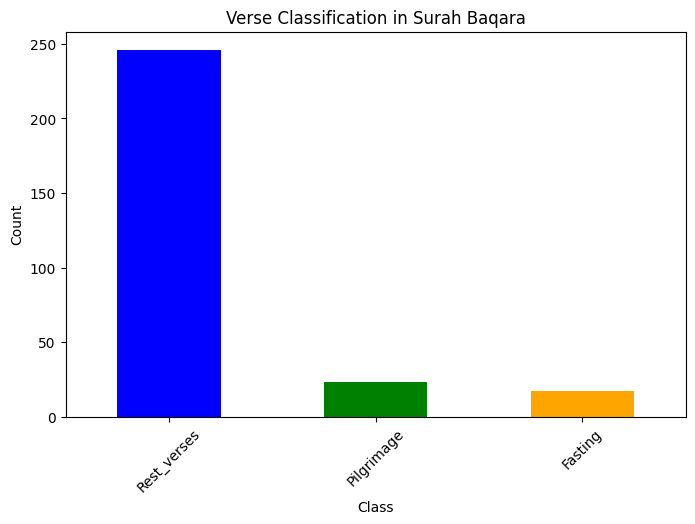

In [11]:
# Plot
plt.figure(figsize=(8,5))
class_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title("Verse Classification in Surah Baqara")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [12]:
from collections import Counter
import re

In [13]:
# Combine all fasting verses into a single string
text = ' '.join(fasting_verses['Sura Baqara'].astype(str))

In [14]:
text

'Who believe in the Unseen are steadfast in prayer and spend out of what We have provided for them. Then We raised you up after your death; ye had the chance to be grateful. Those who conceal the clear (Signs) We have sent down and the guidance after We have made it clear for the people in the book on them shall be GodÕs curse and the curse of those entitled to curse. O ye who believe! eat of the good things that We have provided for you and be grateful to God if it is Him ye worship. He hath only forbidden you dead meat and blood and the flesh of swine and that on which any other name hath been invoked besides that of God but if one is forced by necessity without wilful disobedience nor transgressing due limits then is he guiltless. For God is Oft-Forgiving Most Merciful. OÊye who believe! fasting is prescribed to you as it was prescribed to those before you that ye may (learn) self-restraint. (Fasting) for a fixed number of days; but if any of you is ill or on a journey the prescribe

In [16]:
# Clean the text by removing special characters and converting to lowercase
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

In [17]:
# Split text into individual words
words = cleaned_text.split()

In [18]:
# Count word frequency
word_counts = Counter(words)

In [19]:
word_counts

Counter({'who': 10,
         'believe': 4,
         'in': 17,
         'the': 31,
         'unseen': 1,
         'are': 10,
         'steadfast': 1,
         'prayer': 2,
         'and': 29,
         'spend': 2,
         'out': 1,
         'of': 18,
         'what': 3,
         'we': 5,
         'have': 6,
         'provided': 3,
         'for': 20,
         'them': 10,
         'then': 4,
         'raised': 1,
         'you': 23,
         'up': 4,
         'after': 6,
         'your': 9,
         'death': 1,
         'ye': 14,
         'had': 1,
         'chance': 1,
         'to': 28,
         'be': 10,
         'grateful': 3,
         'those': 9,
         'conceal': 1,
         'clear': 6,
         'signs': 5,
         'sent': 2,
         'down': 2,
         'guidance': 2,
         'made': 3,
         'it': 9,
         'people': 1,
         'book': 1,
         'on': 9,
         'shall': 2,
         'gods': 1,
         'curse': 3,
         'entitled': 1,
         'o': 1,
         'ea

In [20]:
# Display the 10 most common words
most_common_words = word_counts.most_common(10)
print("Top 10 most common words in fasting verses:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Top 10 most common words in fasting verses:
the: 31
and: 29
to: 28
you: 23
is: 22
that: 21
for: 20
god: 20
of: 18
in: 17


In [21]:
fasting_verses.describe()

,Verse No
count,17.000000
mean,184.000000
std,65.749525
min,3.000000
25%,173.000000
50%,186.000000
75%,226.000000
max,266.000000


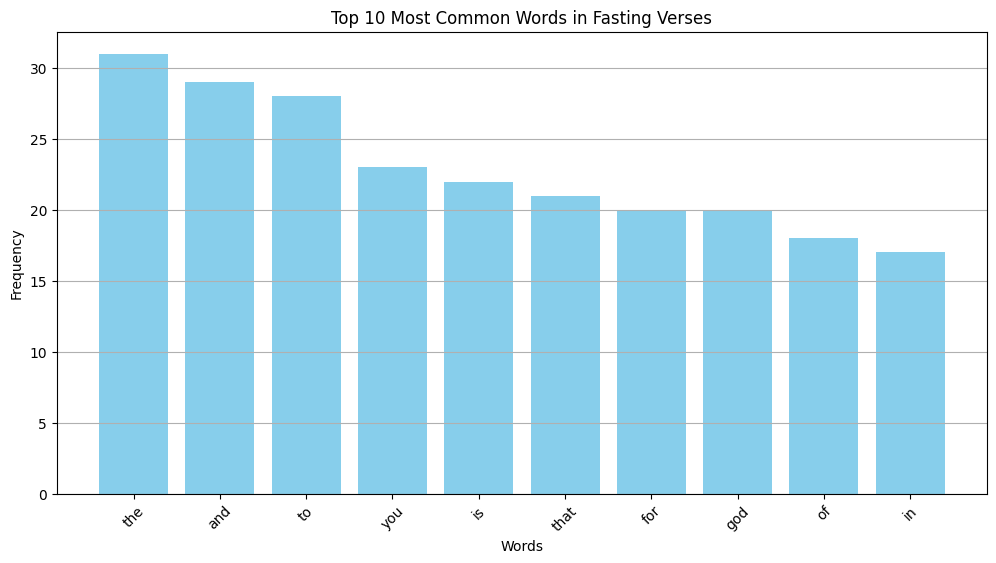

In [22]:
# Plot the frequency of the top 10 words
words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Fasting Verses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()